<a href="https://colab.research.google.com/github/KILjungjoon/Project_Korean/blob/main/sg5win100vec1min_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# 45가지 w2v 임베딩 모델 생성하기
from tqdm import tqdm
from time import sleep
import numpy as np
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pandas as pd
text=pd.read_csv("/content/drive/MyDrive/KoreanProject/data/cor.mc_new.txt", header=None)
text.columns=['word']
text['word_num']=text['word'].str.count(" ")+1
df01=text[text['word_num']>200].index        # 이상치(행의 단어 수가 200을 넘는 경우) 제거 
df=text.drop(df01)

# tokenizing and creating the corpus
corpus = []
for col in df.word:
   word_list = col.split(" ")
   corpus.append(word_list)

# Define the hyperparameters

num_features_list = [100, 300, 500]
min_word_count_list = [2, 65, 213]
num_workers = 4
for context in tqdm(range(6,10)) :
  for num_features in num_features_list :
    for min_word_count in min_word_count_list :
      
      # Initialize and train the model
      model = Word2Vec(corpus, workers=num_workers, size=num_features, min_count=min_word_count, window=context)
      model.init_sims(replace=True)
      model_name = f'sg{context}win{num_features}vec{min_word_count}min_model'
      model.save('/content/drive/MyDrive/KoreanProject/임베딩모델파일/'+model_name+'')
      sleep(5)

100%|██████████| 4/4 [37:44<00:00, 566.17s/it]


In [ ]:
# 파라미터 설정
num_features = 100    # wordvector 차원               
min_word_count = 1    # 최소 출현 회수 반영              
num_workers = 4       # the number of thread, defalt is 4
context = 5          # window 사이즈                                                                                
# downsampling = 1e-5   # 빈번히 등장하는 단어 subsampling

# 텍스트파일 불러와서 전처리
import pandas as pd
text=pd.read_csv("/content/drive/MyDrive/KoreanProject/data/cor.mc_new.txt", header=None)
text.columns=['word']
text['word_num']=text['word'].str.count(" ")+1
df01=text[text['word_num']>200].index        # 이상치(행의 단어 수가 200을 넘는 경우) 제거 
df=text.drop(df01)

# tokenizing and creating the corpus
corpus = []
for col in df.word:
   word_list = col.split(" ")
   corpus.append(word_list)

# Initialize and train the model
model = Word2Vec(corpus, workers=num_workers, 
            size=num_features, min_count = min_word_count, 
            window = context) # sample = downsampling   # alpha is defalt 0.025

model.init_sims(replace=True) #학습이 완료 되면 필요없는 메모리를 unload
model_name = 'sg5win100vec1min_model' #모델 저장
model.save('/content/drive/MyDrive/KoreanProject/임베딩모델파일/'+model_name+'')

---
---
* 이하 소스 코드

In [1]:
# 실행후 런타임 다시 시작, 그리고 재실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [10]:
import pandas as pd
text=pd.read_csv("/content/drive/MyDrive/KoreanProject/data/cor.mc_new.txt", header=None)
text.columns=['word']
text['word_num']=text['word'].str.count(" ")+1
df01=text[text['word_num']>200].index        # 이상치(행의 단어 수가 200을 넘는 경우) 제거 
df=text.drop(df01)
print("origin text:",text.shape)
print("dropped text:",df.shape)        # 7개의 이상치 행 제거 완료
df.describe()                          # 최종데이터는 692,306 행

origin text: (692313, 2)
dropped text: (692306, 2)


,word_num
count,692306.000000
mean,10.055337
std,6.950937
min,1.000000
25%,5.000000
50%,9.000000
75%,13.000000
max,190.000000


In [11]:
# tokenizing and creating the corpus
corpus = []
for col in df.word:
   word_list = col.split(" ")
   corpus.append(word_list)

#show first value
corpus[0]

['카오스', '이론01', '자연01', '보다', '새롭다', '시각04', '최근', '과학', '새롭다', '변혁', '일어나다']

In [12]:
from gensim.models import Word2Vec, FastText
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib import font_manager as fm
from matplotlib import rc
import re
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [13]:
# 파라미터 설정
num_features = 100    # wordvector 차원               
min_word_count = 1    # 최소 출현한 단어 반영              
num_workers = 4       # the number of thread, defalt is 4
context = 5          # window 사이즈                                                                                
# downsampling = 1e-5   # 빈번히 등장하는 단어 subsampling

In [14]:
# Initialize and train the model
model = Word2Vec(corpus, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context) # sample = downsampling   # alpha is defalt 0.025

model.init_sims(replace=True) #학습이 완료 되면 필요없는 메모리를 unload
model_name = 'sg5win100vec1min_model' #모델 저장
model.save('/content/drive/MyDrive/KoreanProject/임베딩모델파일/'+model_name+'')
# print(model.wv.vectors)

In [22]:
len(model.wv.vocab)

111695

In [23]:
# 단어 사전에서 상위 30개만 보기
vocab = model.wv.vocab
sorted(vocab, key=vocab.get, reverse=True)[:30]

['하다',
 '있다',
 '되다01',
 '없다',
 '말01',
 '사람',
 '때01',
 '보다01',
 '같다',
 '대하다02',
 '일01',
 '생각01',
 '위하다01',
 '가다',
 '그러나',
 '그렇다',
 '알다',
 '또',
 '오다',
 '받다01',
 '그리고',
 '크다',
 '더',
 '많다',
 '속01',
 '살다01',
 '좋다',
 '문제06',
 '모르다',
 '사회07']

In [20]:
model.most_similar("정치03")

[('정치인', 0.7615491151809692),
 ('민주주의', 0.7556020617485046),
 ('민주02', 0.7459425926208496),
 ('당14', 0.7333987951278687),
 ('야09', 0.7318124771118164),
 ('여21', 0.7266250848770142),
 ('정권04', 0.7220982909202576),
 ('개혁', 0.7171632647514343),
 ('당내04', 0.713661789894104),
 ('정계04', 0.7064404487609863)]

In [36]:
model.most_similar("컴퓨터")

[('인터넷', 0.7743346095085144),
 ('소프트웨어', 0.7689559459686279),
 ('전자06', 0.760550856590271),
 ('시스템', 0.7551476955413818),
 ('하드웨어', 0.7449935078620911),
 ('디지털', 0.744258463382721),
 ('데이터', 0.7435948848724365),
 ('전송04', 0.7344845533370972),
 ('통신', 0.7233526706695557),
 ('화상09', 0.7232147455215454)]

In [21]:
# 두 단어의 유사도 계산
model.wv.similarity('정치03', '대통령')

0.5908805

<ipython-input-6-778d4a3a1da8>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[vocab]
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


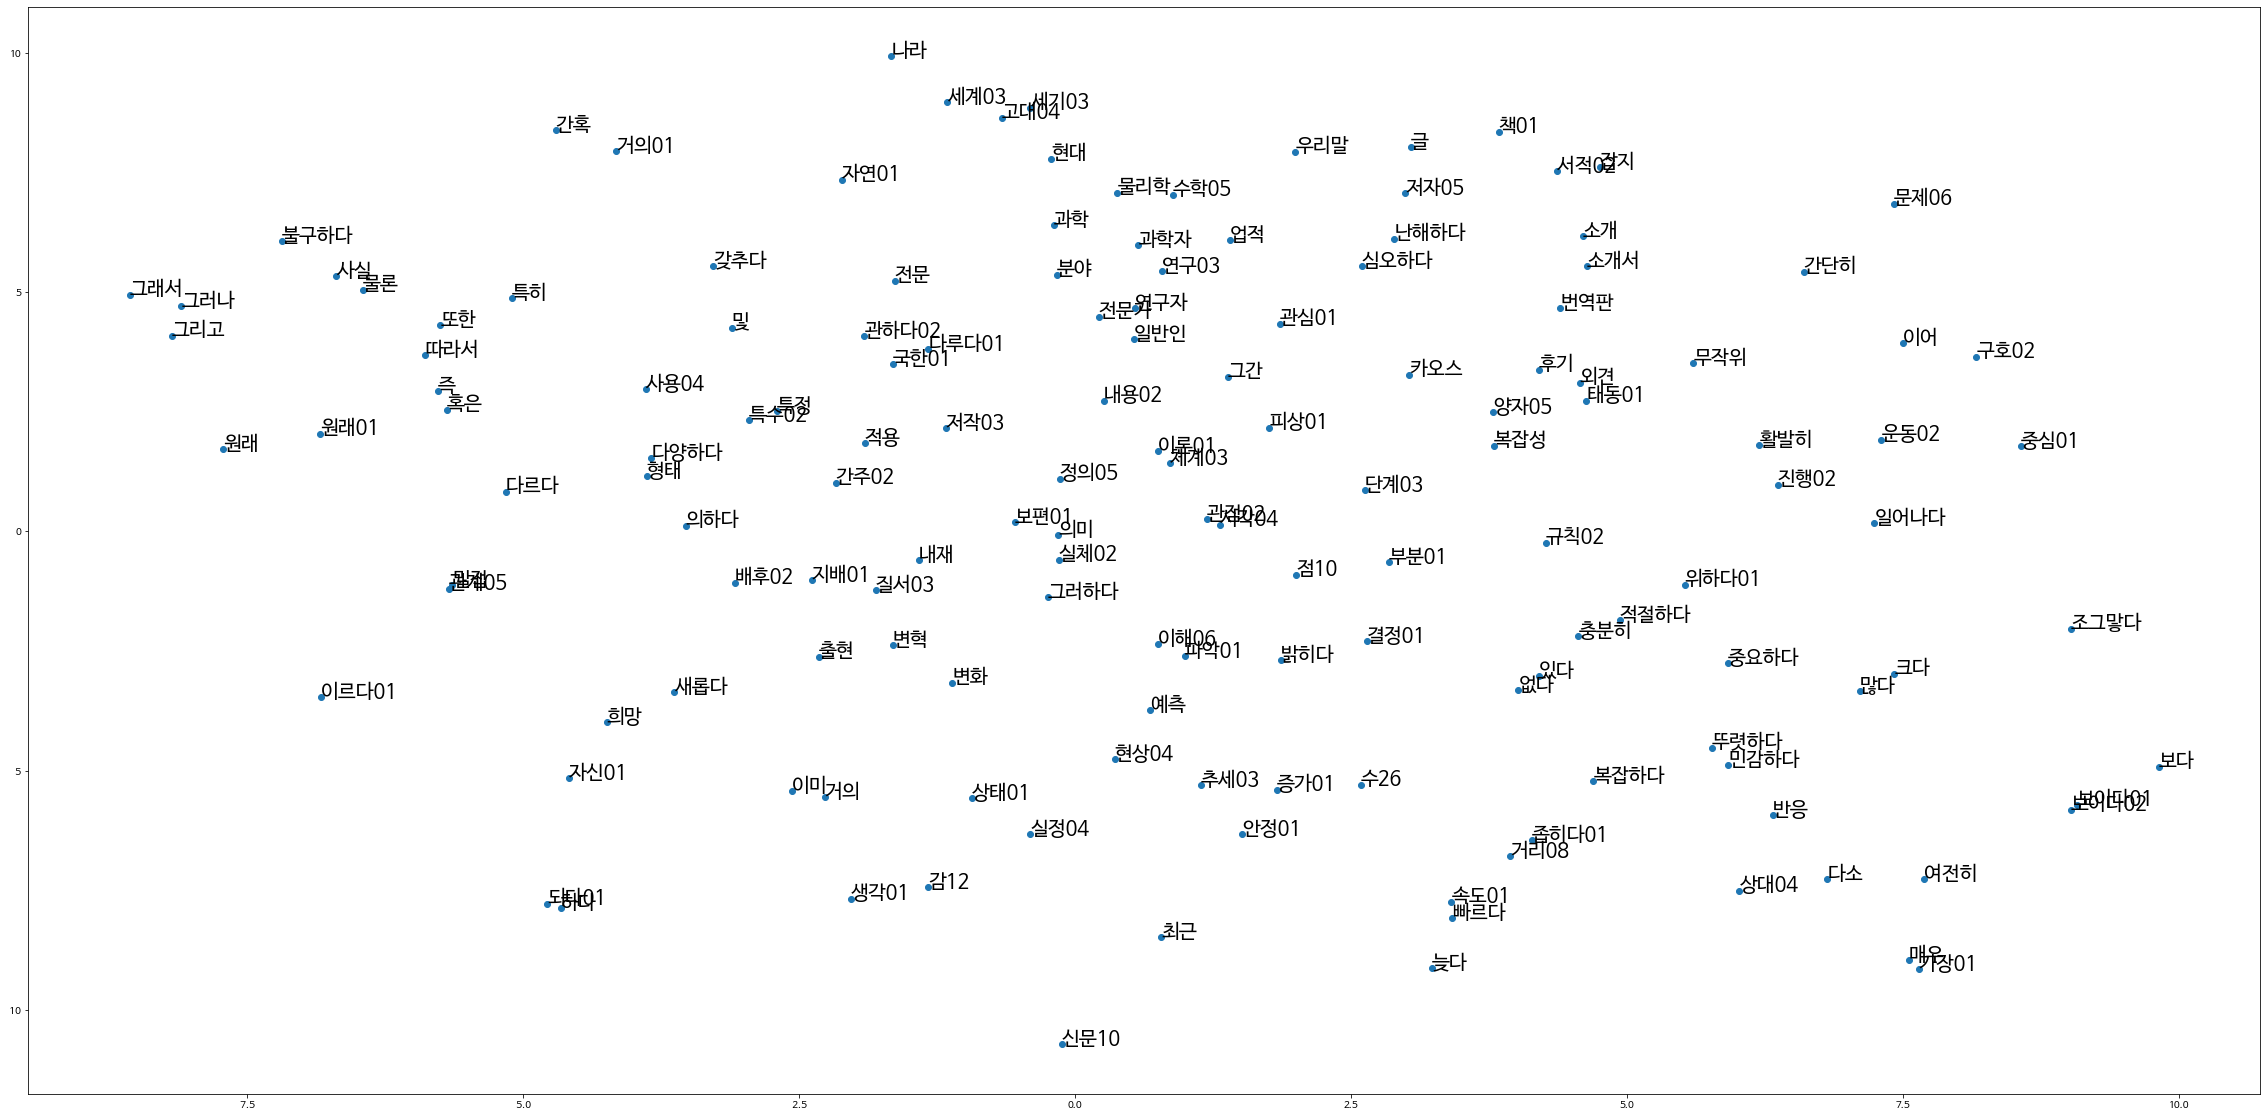

In [6]:
from sklearn.manifold import TSNE
import gensim.models as g
model_name = 'sg5win100vec1min_model'
model = g.Word2Vec.load('/content/drive/MyDrive/KoreanProject/임베딩모델파일/'+model_name+'')

vocab = list(model.wv.vocab)
X = model[vocab]


tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:150,:])
df = pd.DataFrame(X_tsne, index=vocab[:150], columns=['x', 'y'])
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=20)
# plt.savefig("word2vec_100")
# plt.show()